# Data Exploration

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Load data

In [244]:
df = pd.read_csv("data/deliverytime.csv")

print(df.columns)

df.describe()

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


Some of the column names aren't great (e.g. "Time_taken(min)"). Let's rename them first.

In [245]:
cols = df.columns.tolist()
cols[-1] = "time_taken"
cols = [col.lower() for col in cols]
df.columns = cols
print(cols)

['id', 'delivery_person_id', 'delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'type_of_order', 'type_of_vehicle', 'time_taken']


## Missing values

In [246]:
df.isnull().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
type_of_order                  0
type_of_vehicle                0
time_taken                     0
dtype: int64

There are no missing values present in the dataset, so there is no need to impute or to drop any columns or rows.

## Dependent variable

Average delivery time: 26.29460662821047
Median delivery time: 26.0


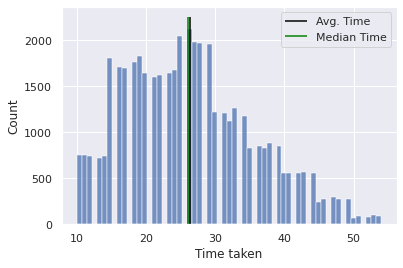

In [247]:
avg_time = df.time_taken.mean()
median_time = df.time_taken.median()
print(f"Average delivery time: {avg_time}")
print(f"Median delivery time: {median_time}")
hist = sns.histplot(df.time_taken)
hist.vlines(avg_time, 0, 2250, color = "black", label = "Avg. Time")
hist.vlines(median_time, 0, 2250, color = "green", label = "Median Time")
hist.set(xlabel = "Time taken")
hist.legend()

The distribution has a positive skew, and the mean is slightly above the median. The fastest deliveries take only ten minutes, the slowest 54 minutes.

## Categorical independent variables

In [248]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,id,delivery_person_id,type_of_order,type_of_vehicle
0,4607,INDORES13DEL02,Snack,motorcycle
1,B379,BANGRES18DEL02,Snack,scooter
2,5D6D,BANGRES19DEL01,Drinks,motorcycle
3,7A6A,COIMBRES13DEL02,Buffet,motorcycle
4,70A2,CHENRES12DEL01,Snack,scooter


There are four categorical variables: delivery id, delivery person ID, the type of order and the type of vehicle. The id is largely meaningless, but it does seem to contain a restaurant ID.

In [249]:
import re

pattern = r"^.+RES\d{2}"

df["restaurant"] = [re.search(pattern, cell).group() for cell in df.delivery_person_id]

restaurants = list(set(df.restaurant))
restaurants.sort()
print(len(restaurants))

df.sort_values(by=['restaurant']).loc[0:100, ["restaurant", "restaurant_latitude", "restaurant_longitude"]]

418


,restaurant,restaurant_latitude,restaurant_longitude
0,INDORES13,22.745049,75.892471
11859,INDORES13,22.745049,75.892471
12357,INDORES13,22.745049,75.892471
14807,INDORES13,22.745049,75.892471
12346,INDORES13,22.745049,75.892471
...,...,...,...
17549,PUNERES17,18.530963,73.828972
3759,PUNERES17,18.530963,73.828972
34206,PUNERES17,18.530963,73.828972
23936,PUNERES17,18.530963,73.828972


As cases with the same restaurant ID share the same location, we can infer that there are a total of 418 restaurants.

In [250]:
cat_cols.drop("id", axis = 1, inplace = True)

### Type of order

In [251]:
print(f"Number of unique order types: {cat_cols.type_of_order.nunique()}")
cat_cols.type_of_order.unique().tolist()

Number of unique order types: 4


['Snack ', 'Drinks ', 'Buffet ', 'Meal ']

The categories have superfluous whitespaces at the end of the string. These are removed first.

In [252]:
cat_cols["type_of_order"] = [cell.strip() for cell in cat_cols.type_of_order]

<AxesSubplot:xlabel='type_of_order', ylabel='time_taken'>

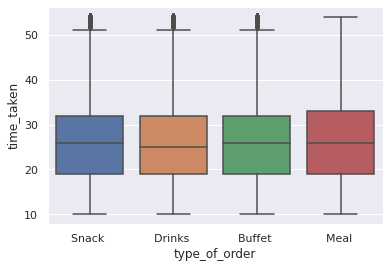

In [253]:
sns.boxplot(x = df.type_of_order, y = df.time_taken)

In [254]:
df.groupby("type_of_order")["time_taken"].describe()

,count,mean,std,min,25%,50%,75%,max
type_of_order,,,,,,,,
Buffet,11280.0,26.283511,9.411344,10.0,19.0,26.0,32.0,54.0
Drinks,11322.0,26.187953,9.298465,10.0,19.0,25.0,32.0,54.0
Meal,11458.0,26.419270,9.424849,10.0,19.0,26.0,33.0,54.0
Snack,11533.0,26.286309,9.399147,10.0,19.0,26.0,32.0,54.0


Meals tend to take slightly longer to deliver, but the difference isn't large.

### Type of vehicle

In [255]:
print(f"Number of unique vehicle types: {cat_cols.type_of_vehicle.nunique()}")
cat_cols.type_of_vehicle.unique().tolist()

Number of unique vehicle types: 4


['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle ']

In [256]:
cat_cols["type_of_vehicle"] = [cell.strip() for cell in cat_cols.type_of_vehicle]

<AxesSubplot:xlabel='type_of_vehicle', ylabel='time_taken'>

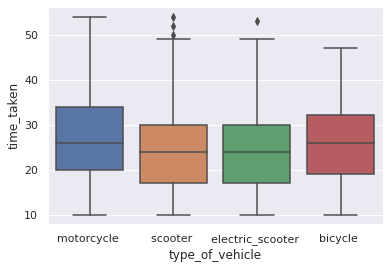

In [257]:
sns.boxplot(x = df.type_of_vehicle, y = df.time_taken)

In [258]:
df.groupby("type_of_vehicle")["time_taken"].describe()

,count,mean,std,min,25%,50%,75%,max
type_of_vehicle,,,,,,,,
bicycle,68.0,26.426471,9.262855,10.0,19.0,26.0,32.25,47.0
electric_scooter,3814.0,24.470110,8.610859,10.0,17.0,24.0,30.00,53.0
motorcycle,26435.0,27.605674,9.647811,10.0,20.0,26.0,34.00,54.0
scooter,15276.0,24.480754,8.704238,10.0,17.0,24.0,30.00,54.0


Deliveries brought by motorcycle or bicycle tend to take longer to deliver. This doesn't necessarily have to be a causal relationship. It could simply be that motorcycles are used to reach destinations that are farther away. It's also of note that only very few deliveries are done by bicycle, so the summary statistics might not be very meaningful in this case.

### Delivery person

In [259]:
print(f"Number of unique delivery person ids: {cat_cols.delivery_person_id.nunique()}")

Number of unique delivery person ids: 1320


In [260]:
person_id_table = cat_cols.delivery_person_id.value_counts()
person_id_table.describe()

count    1320.000000
mean       34.540152
std        21.305850
min         5.000000
25%        13.000000
50%        41.000000
75%        56.000000
max        67.000000
Name: delivery_person_id, dtype: float64

The average delivery person has carried out 34.5 deliveries. The delivery person with the fewest number of deliveries has 5, while the most active delivery person has 67 deliveries under their belt. Considering the high number of delivery persons and the relatively few deliveries per person, dummifying this variable might be more trouple than it is worth. It is dropped for now.

In [261]:
cat_cols.drop("delivery_person_id", axis = 1, inplace = True)

### Dummifying

The type of vehicle and the type of order have relatively few unique categories and they might have a relation to the outcome variable. These two variables will be dummified, while the other two variables (order ID and delivery person ID) have been dropped.

In [262]:
cat_cols_dummy = pd.get_dummies(cat_cols)
print(cat_cols_dummy.columns)

Index(['type_of_order_Buffet', 'type_of_order_Drinks', 'type_of_order_Meal',
       'type_of_order_Snack', 'type_of_vehicle_bicycle',
       'type_of_vehicle_electric_scooter', 'type_of_vehicle_motorcycle',
       'type_of_vehicle_scooter'],
      dtype='object')


For each variable, the first category is dropped and used as reference category. In the case of the type of order, the category I've chosen as reference is "Drinks" as they are easy to prepare and slightly faster to deliver. The type of vehicle chosen as the reference category is "Motorcyle" because they are most frequently used.

In [263]:
cat_cols_dummy.drop(["type_of_order_Drinks", "type_of_vehicle_motorcycle"], axis = 1, inplace = True)
cat_cols_dummy.head()

,type_of_order_Buffet,type_of_order_Meal,type_of_order_Snack,type_of_vehicle_bicycle,type_of_vehicle_electric_scooter,type_of_vehicle_scooter
0,0,0,1,0,0,0
1,0,0,1,0,0,1
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,1


## Numeric independent variables

### Distance

The variables 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude' can be used to calculate beeline location. Of course, delivery drivers can't drive in a straight line to their location, but calculating exact distance would be much more difficult. So this is still a good enough approximation.

But first, there seem to be both negative and positive values in the data. Either these locations are very far apart, or there is some error in the data.

In [264]:
df.loc[df.restaurant_latitude < 0, :]

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,time_taken,restaurant
92,C042,AGRRES010DEL01,34,4.7,-27.163303,78.057044,27.233303,78.127044,Drinks,scooter,15,AGRRES01
283,C044,AGRRES12DEL03,32,4.7,-27.165108,78.015053,27.225108,78.075053,Meal,scooter,31,AGRRES12
289,4DB,PUNERES02DEL03,29,4.6,-18.551440,-73.804855,18.611440,73.864855,Meal,scooter,12,PUNERES02
425,C003,DEHRES13DEL02,29,4.6,-30.366322,-78.070453,30.496322,78.200453,Snack,scooter,20,DEHRES13
534,473,MYSRES07DEL03,29,4.6,-12.325461,-76.632278,12.385461,76.692278,Buffet,scooter,16,MYSRES07
...,...,...,...,...,...,...,...,...,...,...,...,...
44933,C0C2,AURGRES03DEL03,30,4.9,-19.874733,75.353942,19.904733,75.383942,Buffet,motorcycle,15,AURGRES03
45020,56B,PUNERES04DEL01,29,4.6,-18.514210,73.838429,18.524210,73.848429,Drinks,electric_scooter,30,PUNERES04
45108,C01B,GOARES18DEL01,29,4.6,-15.493950,-73.827423,15.563950,73.897423,Meal,scooter,19,GOARES18
45182,C0C7,KNPRES16DEL02,30,4.0,-26.482581,80.315628,26.532581,80.365628,Drinks,motorcycle,34,KNPRES16


As we can see here, the absolute vale of the restaurant latitude seems to be very close to delivery location latitude. As it is highly unlikely that the delivery has crossed the equator or the prime meridian, the values have to be corrected. The locations are likely all in India (for example, [30.496322, 78.200453] is in Uttarakhand), so both positive latitude and positive longitude is assumed.

There are also many restaurants with a location of (0, 0). 

In [265]:
tmp = df.loc[df.restaurant_latitude == 0, :]

print(tmp.delivery_location_latitude.describe())
print(tmp.delivery_location_longitude.describe())

count    3640.000000
mean        0.063016
std         0.036047
min         0.010000
25%         0.030000
50%         0.060000
75%         0.090000
max         0.130000
Name: delivery_location_latitude, dtype: float64
count    3640.000000
mean        0.063016
std         0.036047
min         0.010000
25%         0.030000
50%         0.060000
75%         0.090000
max         0.130000
Name: delivery_location_longitude, dtype: float64


In these cases, the delivery location latitude and longitude are all positive and closeby.

The absolute value of all location variables should be taken.

In [266]:
df["restaurant_latitude"] = df["restaurant_latitude"].abs()
df["restaurant_longitude"] = df["restaurant_longitude"].abs()
df["delivery_location_latitude"] = df["delivery_location_latitude"].abs()
df["delivery_location_longitude"] = df["delivery_location_longitude"].abs()

Finally, we can calculate the beeline distance.

In [267]:
def calculate_distance(lat1, lat2, lon1, lon2):
    """ Calculate the distance between two points using the haversine formula """
    lat1, lat2, lon1, lon2 = map(np.radians, [lat1, lat2, lon1, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    b = 2 * np.arctan2(a ** 0.5, (1-a) ** 0.5)
    
    return b * 6371

df["beeline_distance"] = calculate_distance(df.restaurant_latitude, df.delivery_location_latitude, 
                                            df.restaurant_longitude, df.delivery_location_longitude)
beeline_distance.describe()

count    45593.000000
mean         0.907852
std         10.087993
min          0.014141
25%          0.042426
50%          0.084853
75%          0.127279
max        182.546210
dtype: float64

<AxesSubplot:xlabel='beeline_distance', ylabel='time_taken'>

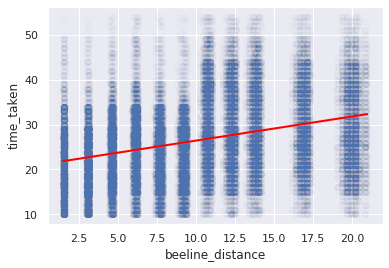

In [268]:
sns.regplot(x = df.beeline_distance, y = df.time_taken, 
            scatter_kws = {'alpha':0.01},
            line_kws = {"color": 'red', "linewidth": 2})

There seems to be a positive association between the beeline distance and the time taken.

### Age and rating of delivery person

[Text(0.5, 1.0, 'Correlation Matrix')]

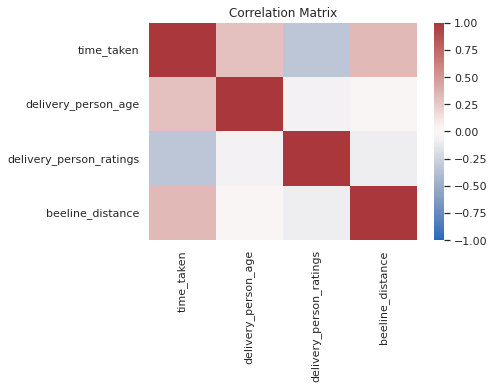

In [269]:
df_num = df[["time_taken", "delivery_person_age", "delivery_person_ratings", "beeline_distance"]]
corr_matrix = df_num.corr()
heatplot = sns.heatmap(corr_matrix, cmap = "vlag", vmin = -1, vmax = 1)
heatplot.set(title = "Correlation Matrix")

- Older delivery persons take more time for the delivery
- Delivery persons with high ratings deliver more quickly
- The associations beetween the independent variables is low, so we expect no issues with multicollinearity

In [270]:
print(df.delivery_person_ratings.describe())
print(f"Number of cases with a rating of 6: {sum(df.delivery_person_ratings == 6)}")

count    45593.000000
mean         4.632367
std          0.327708
min          1.000000
25%          4.600000
50%          4.700000
75%          4.800000
max          6.000000
Name: delivery_person_ratings, dtype: float64
Number of cases with a rating of 6: 53


There are 53 cases with a rating of 6. A rating scale from 1 to 5 is uncommon, and the cases are very few, so this is probably a mistake. The rating is recoded to 5.

In [271]:
df.loc[df.delivery_person_ratings == 6, "delivery_person_ratings"] = 5

<AxesSubplot:xlabel='delivery_person_ratings', ylabel='time_taken'>

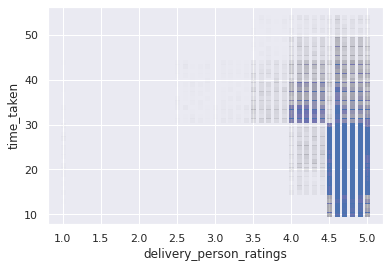

In [272]:
sns.scatterplot(x = df.delivery_person_ratings, y = df.time_taken, alpha = 0.005)

<AxesSubplot:xlabel='delivery_person_age', ylabel='time_taken'>

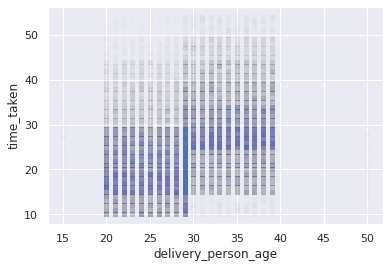

In [273]:
sns.scatterplot(x = df.delivery_person_age, y = df.time_taken, alpha = 0.005)

## Save dataset

In [274]:
print(df.columns)
print(cat_cols_dummy.columns)

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'type_of_order', 'type_of_vehicle',
       'time_taken', 'restaurant', 'beeline_distance'],
      dtype='object')
Index(['type_of_order_Buffet', 'type_of_order_Meal', 'type_of_order_Snack',
       'type_of_vehicle_bicycle', 'type_of_vehicle_electric_scooter',
       'type_of_vehicle_scooter'],
      dtype='object')


In [275]:
df_finished = pd.concat([
    df[["time_taken", "delivery_person_age", "delivery_person_ratings", "beeline_distance"]],
    cat_cols_dummy
], axis = 1)
df_finished.head()

,time_taken,delivery_person_age,delivery_person_ratings,beeline_distance,type_of_order_Buffet,type_of_order_Meal,type_of_order_Snack,type_of_vehicle_bicycle,type_of_vehicle_electric_scooter,type_of_vehicle_scooter
0,24,37,4.9,3.025149,0,0,1,0,0,0
1,33,34,4.5,20.183530,0,0,1,0,0,1
2,26,23,4.4,1.552758,0,0,0,0,0,0
3,21,38,4.7,7.790401,1,0,0,0,0,0
4,30,32,4.6,6.210138,0,0,1,0,0,1


In [276]:
df_finished.to_csv("data/deliverytime_processed.csv")